<a href="https://colab.research.google.com/github/sasireddyvari/Complete_Machine_Learning/blob/master/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

It is based on the relationships/patterns between the independent and dependent variables.It is suitable and used for the problem statements where the output is a number.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [66]:
x=[5,7]
y=[10,15]

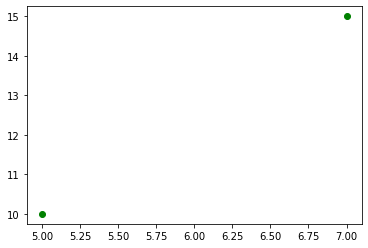

In [59]:
plt.scatter(x,y,color='g')

In [62]:
m = (15-10)/(7-5)
m

2.5

In [69]:
# y=mx+c
y_mean=np.mean(y)
print(y_mean)
x_mean=np.mean(x)
x_mean

12.5


6.0

In [70]:
c =  y_mean - m * x_mean
c

-2.5

In [74]:
x1=8
x2=6
m=2.5
c=-2.5

y1= m * x1 + c
y2= m * x2 + c
print(y1,y2)

17.5 12.5


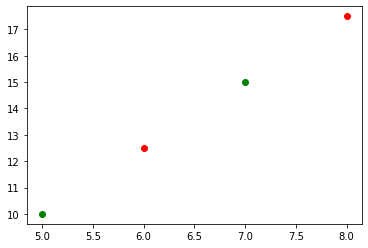

In [75]:
plt.scatter(x,y,color='g')
plt.scatter([x1,x2],[y1,y2],color='r')

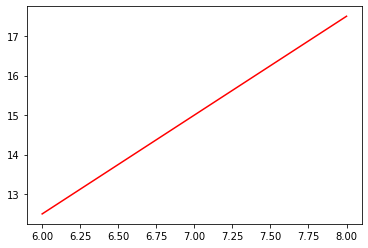

In [76]:
plt.plot([x1,x2],[y1,y2],color='r')

**Sample dataset**

In [77]:
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Salary_Data.csv')
df.head()

,YearsExperience,Age,Salary
0,1.1,21.0,39343
1,1.3,21.5,46205
2,1.5,21.7,37731
3,2.0,22.0,43525
4,2.2,22.2,39891


In [78]:
df.corr()

,YearsExperience,Age,Salary
YearsExperience,1.000000,0.987258,0.978242
Age,0.987258,1.000000,0.974530
Salary,0.978242,0.974530,1.000000


/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:1912: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


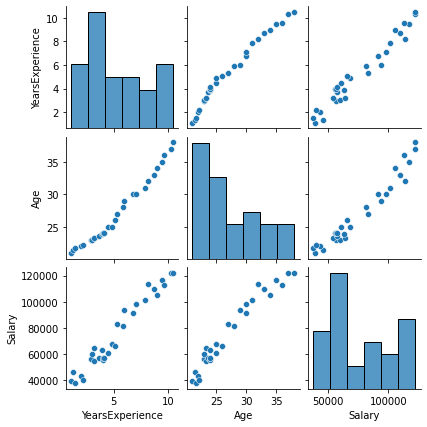

In [79]:
sns.pairplot(df,dropna=True,size=2,kind='scatter')

In [122]:
x=df['Age']
y=df['Salary']

In [123]:
x_mean=np.mean(x)
y_mean=np.mean(y)

numer=0
denom=0
n=len(x)
for i in range(n):
  numer +=(x[i]-x_mean) * (y[i]-y_mean)
  denom +=(x[i]-x_mean) **2

m=numer/denom
c=y_mean - m *x_mean
print(m,c)

5176.281355646983 -64878.12422952536


In [124]:
y_pred=[]
def predict(x,n):
  for i in range(n):
    y=m * x[i] + c
    y_pred.append(y)
  return y_pred
  
predict(x,n)

[43823.78423906128,
 46411.924916884775,
 47447.18118801416,
 49000.065594708256,
 50035.32186583766,
 54176.34695035525,
 54176.34695035525,
 55729.23135704934,
 55729.23135704934,
 57282.11576374344,
 58835.00017043752,
 59352.628306002225,
 59352.628306002225,
 59352.628306002225,
 64528.9096616492,
 64528.9096616492,
 69705.1910172962,
 74881.47237294319,
 80057.75372859015,
 85234.03508423714,
 90410.31643988413,
 90410.31643988413,
 95586.5977955311,
 100762.87915117809,
 105939.16050682508,
 111115.44186247204,
 116291.72321811903,
 121468.00457376603,
 126644.28592941299,
 131820.56728505998]

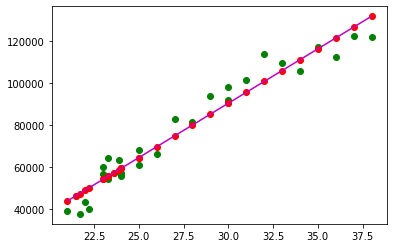

In [125]:
plt.scatter(x,y,color='g')
plt.scatter(x,y_pred,color='r')
plt.plot(x,y_pred,color='m')

In [126]:
ss_r=0
ss_t=0

for i in range(n):
  ss_t += (y[i]-y_mean) **2
  ss_r += (y[i]-y_pred[i]) **2

r2= 1- ss_r/ss_t
print(r2)

0.9497077571981798


In [127]:
data={'y':y,'y_pred':np.round(y_pred),'diff':y-np.round(y_pred)}
err=pd.DataFrame(data)
err

,y,y_pred,diff
0,39343,43824.0,-4481.0
1,46205,46412.0,-207.0
2,37731,47447.0,-9716.0
3,43525,49000.0,-5475.0
4,39891,50035.0,-10144.0
5,56642,54176.0,2466.0
6,60150,54176.0,5974.0
7,54445,55729.0,-1284.0
8,64445,55729.0,8716.0
9,57189,57282.0,-93.0


**Using Scikit Learn**

In [90]:
df.head()

,YearsExperience,Age,Salary
0,1.1,21.0,39343
1,1.3,21.5,46205
2,1.5,21.7,37731
3,2.0,22.0,43525
4,2.2,22.2,39891


In [92]:
x=df.iloc[:,:-1]
x.head()

,YearsExperience,Age
0,1.1,21.0
1,1.3,21.5
2,1.5,21.7
3,2.0,22.0
4,2.2,22.2


In [94]:
y=df.iloc[:,-1]
y.head()

0    39343
1    46205
2    37731
3    43525
4    39891
Name: Salary, dtype: int64

In [95]:
from sklearn.model_selection import train_test_split

In [96]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=20)

In [97]:
x_train.head()

,YearsExperience,Age
18,5.9,28.0
27,9.6,36.0
24,8.7,33.0
23,8.2,32.0
21,7.1,30.0


In [98]:
from sklearn.linear_model import LinearRegression

In [100]:
lin_reg=LinearRegression()
lin_reg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [102]:
y_predict=lin_reg.predict(x_test)
y_predict

array([ 63446.25913374,  47960.66002005,  40872.16377123,  61960.86462817,
       128441.22937837,  62784.40607571])

In [106]:
data={'y_test':y_test,'y_pred':np.round(y_predict),'diff':y_test-np.round(y_predict)}
err=pd.DataFrame(data)
err

,y_test,y_pred,diff
13,57081,63446.0,-6365.0
4,39891,47961.0,-8070.0
1,46205,40872.0,5333.0
10,63218,61961.0,1257.0
29,121872,128441.0,-6569.0
12,56957,62784.0,-5827.0


In [107]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [108]:
print(r2_score(y_test,np.round(y_predict)))

0.9510312919698898


In [129]:
print(np.sqrt(mean_squared_error(y_test,y_predict)))

5954.954582273016


In [130]:
input=[3.7,5.7]

In [131]:
y_predict=lin_reg.predict([input])
print("salary predicted, Rs.",y_predict)

salary predicted, Rs. [31209.8716224]
